# 第2回：時系列データの表現と可視化１

以下にプログラムを用意しています。   
解説を読みながら実行していきましょう。
詳細は授業で説明しますので、今は意味が分からなくても大丈夫です。   

## 1. 準備

### 準備（第1回授業で解説済み）

本授業は、東京大学 数理・情報教育研究センターが提供する授業[Python入門](https://sites.google.com/view/ut-python/)の実行環境と知識を前提としています。   
この授業を受けていない方は、[こちらのページ](https://drive.google.com/drive/folders/12zTZY1NvWqpxvZzC2TXmBeNdK3-q2swi)の`guidance.pdf`に従って、Anaconda navigatorのインストールを行ってください。   
また、同じページの`materials`の下にPython入門の教材がすべて収録されています。   
Python言語の知識がない方、あるいは自信のない方は、こちらの教材を使って基礎的な知識を身に付けておいてください。


### データ分析用ライブラリ「pandas」の復習

pandasライブラリにはデータ分析作業を支援するためのモジュールが含まれています。   
東京大学 数理・情報教育研究センターが提供する授業[Python入門](https://sites.google.com/view/ut-python/)を受講していない方や、忘れてしまった方は、Python入門7-1の教材をもう一度復習してください。  
Python入門7-1の教材は、[こちらのページ](https://drive.google.com/drive/folders/12zTZY1NvWqpxvZzC2TXmBeNdK3-q2swi)の「materials/7」に置かれています(このページにアクセスするにはECCSアカウントが必要です）。

### 第２回の必須演習と発展敵演習

第２回で必ず演習してきていただきたいのは以下の３つです。
- TimeSriesDataAnalysis1.ipynb (この教材）
- TimeSriesDataAnalysis2.ipynb
- TimeSriesDataAnalysis3.ipynb

以下は発展的演習です。   
興味のある方はやってみてください。
- Stooq.ipynb：ポーランドの株価・為替情報ポータル。日本の株価データが取得できます
- WorldBank.ipynb：世界銀行が提供する各種情報（貧困、経済、気候変動など）が取得可能

## 2. 株価の取得と記録

pandas_datareaderは、株価や為替に関する情報や、各種統計データにリアルタイムでアクセスすることを可能とするパッケージです。   
[pandas-datareaderマニュアル](https://pydata.github.io/pandas-datareader/devel/remote_data.html#iex)

datareaderのサービスを提供しているサイトには以下のようなものがあります。   
これらのサービスは変更される可能性があります。最新は[こちら](https://pandas-datareader.readthedocs.io/en/latest/readers/index.html)を確認してください。

- Federal Reserve Economic Data (FRED)
- Fama-French Data (Ken French’s Data Library)
- Bank of Canada
- Engima
- Eurostat
- The Investors Exchange (IEX)
- Moscow Exchange (MOEX)
- Morningstar
- NASDAQ
- Organisation for Economic Co-operation and Development (OECD)
- Quandl
- Robinhood
- Stooq.com
- Tiingo
- Thrift Savings Plan (TSP)
- World Bank

### 2.1 オンラインからの株価の取得

pandas_datareaderを使ってトヨタの株価を取得してみましょう。   

**2019/6/15より、[The Investors Exchange (IEX)](https://en.wikipedia.org/wiki/IEX)は認証なしでデータを提供する形式から、 認証ありに切り替えたようです。**   
ですので、ここでは[Stooq](https://stooq.com)というポーランドの会社からデータを取得しましょう。   
**Stooqは一日あたり250回のアクセス制限があるので注意してください。**

なお、StooqはIEXと違い、開始日（start)と終了日（end)を指定してデータをとってくることができません。   
期間の制限は後の処理で行うことにしましょう。

DataReaderの第１引数である`'TM.US'`はNasdaqが定めたTOYOTA MOTOR CORPのティッカーコード（銘柄コード）です。

**ここでエラーが出た人は3.に進んで下さい。**

In [1]:
import pandas_datareader.data as web
from datetime import datetime

df = web.DataReader('TM.US', 'stooq') # Stooqではデータ取得時にstartとendによるデータ制限ができません
df.head(5) # 最初の5行を出力

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-17,124.29,124.47,123.810,124.17,85259
2019-06-14,124.45,124.65,124.260,124.39,154298
2019-06-13,124.45,124.79,124.193,124.79,119816
2019-06-12,125.10,126.00,125.100,125.68,233125
2019-06-11,124.50,125.25,124.380,124.99,153523


以上のプログラムで取得できた情報は以下の5種類です。  
このうちOpen, High, Low, Closeの単位はIEXならドルです。これら４つを合わせてOHLCという略称で呼ぶこともあります。   
出来高はその日売買が成立した株数のことで、これだけ単位が違います。

```
Open : 始値
High : 高値
Low : 安値
Close : 終値
Volume: 出来高
```

取ってくる会社によって、仕様が異なる。今回はOpenとなっているが、openと書かれたデータもある。

## 2.2 取得銘柄の変更

米国市場における株式のティッカーコードはニューヨーク証券取引所やNASDAQで決められます。   
Stooqにおけるシンボル(Indexとも呼びます）は以下のページの左上のテキストボックスで、企業名を検索すると見つけることができます。

[Stooq.com](https://stooq.com)

たとえば、"Toyota"を入力すると、以下の6つが出てくるはずです。

- TM.US：Toyota Motor Corp＠米国市場
- 7203.JP：トヨタ自動車＠日本市場
- TM.UK ：Toyota Motor Corp＠英国市場
- 6201.JP：豊田自動織機＠日本市場
- 8015.JP：豊田通商＠日本市場
- 3116.JP：トヨタ紡織＠日本市場

米国市場におけるToyota Motor Corpの株価データを取得したい場合は、コードを`TM.US`と指定するわけです。

ティッカーシンボルを書き換えて、他の企業の株価も取得してみましょう。   
例えば米国市場で取引されている株式だと…
- TM.US: TOYOTA MOTOR CORP
- HMC.US: HONDA MOTOR CO LTD
- CAJ.US: CANON INC
- MFG.US: MIZUHO FINANCIAL GROUP
- SNE.US: SONY CORP
- AAPL.US: APPLE INC
- GOOG.US: ALPHABET INC-CL C (無議決権株)
- GOOGL.US: ALPHABET INC-CL A (議決権有り）

IEXではニューヨーク証券取引所かNASDAQに上場している企業のみ（日本企業は14社程度）が対象でしたが、   
Stooqは日本市場の株式データも扱っています。   
日本市場の株式は、銘柄コードの後に`.JP`をつければOKです。   

In [2]:
import pandas_datareader.data as web
from datetime import datetime

df = web.DataReader('TM.US', 'stooq')
df.head(5) # 最初の5行だけ表示

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-14,124.45,124.65,124.260,124.39,154298
2019-06-13,124.45,124.79,124.193,124.79,119816
2019-06-12,125.10,126.00,125.100,125.68,233125
2019-06-11,124.50,125.25,124.380,124.99,153523
2019-06-10,123.46,123.93,123.360,123.49,118698


###  2.3 csvファイルへの記録

pandas-datareaderのように、Webサーバにアクセスして情報を取得するサービスでは、同じユーザから大量のアクセスが自動的に送られてくるのを防ぐため、単位時間当たり〇〇回まで、といったアクセス制限が設けられています。   
それを超えるとエラーメッセージが返ってくるので、同じデータは毎回Webから取ってくるのではなく、自分のコンピュータに保存しておくようにしましょう。   

pandasはDataFrameをcsv形式に変換して保存するモジュールを用意しています。  
取得したデータを`stock.csv`という名前で保存します。

In [2]:
df.to_csv("stock.csv")

## 3.  csvファイルの読み込み

csvファイルはExcelで開いてみることができます。   
このノートブックが置かれているフォルダに株価の履歴を記録した`stock.csv`ができているはずなので、これをExcelで開いてみてください。   
ただし、**上書き保存は絶対にしないでください。**  
Excelは日付や数値を独自形式に書き換えてしまうことがあり、それを保存するとデータの内容が変わってしまい、以下のプログラムが動作しなくなる可能性があります。  
たとえば日付を勝手に違うフォーマットに書き換えてしまいます（例：「2019-04-01」-->「2019/4/1」）

csvファイルをpandasで読み込んで、`date`キーの値を
最初の5行だけを表示して見ましょう。   
途中、いくつか処理をしていますが、その内容は授業で説明します。   

In [3]:
import pandas as pd

sdf = pd.read_csv('stock.csv')
sdf['date'] = pd.to_datetime(sdf['Date']) # 'Date'キーの値は日付を表す文字列なので、to_datetimeを適用してdatetime64型に変換
sdf.set_index('date', inplace=True) # 次に、set_index()メソッドで'date'キーの列をインデックスに指定する。
sdf.head(5)

,Date,Open,High,Low,Close,Volume
date,,,,,,
2019-06-17,2019-06-17,124.29,124.47,123.810,124.17,85259
2019-06-14,2019-06-14,124.45,124.65,124.260,124.39,154298
2019-06-13,2019-06-13,124.45,124.79,124.193,124.79,119816
2019-06-12,2019-06-12,125.10,126.00,125.100,125.68,233125
2019-06-11,2019-06-11,124.50,125.25,124.380,124.99,153523


## 4 ローソク足チャートを表示しよう

株価と言えばローソク足チャートですね。   

```
ローソク足チャート（ローソクあしチャート）は、株価などの相場の値動きを時系列に沿って図表として表す手法の一つ。ローソクチャートともいう。

単位期間を定め、単位期間中に初めに付いた値段を始値（はじめね）、最後に付いた値段を終値（おわりね）、最も高い値段を高値（たかね）、最も安い値段を安値（やすね）とし、この四種の値段（四本値＝よんほんね）をローソクと呼ばれる一本の棒状の図形に作図し、時系列に沿って並べて値段の変動をグラフとして表したものである。

```
参照：[Wikipedia::ローソク足チャート](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%BC%E3%82%BD%E3%82%AF%E8%B6%B3%E3%83%81%E3%83%A3%E3%83%BC%E3%83%88)

matplotlibで頑張ってローソク足チャートを描くこともできますが、ここではローソク足チャートを簡単に描画できる`mpl_finance`というモジュールを使います。   
[mpl_financeのHP](https://pypi.org/project/mpl-finance/)   

`mpl_finance`はかつては`matplotlib.finance`という名前で、`matplotlib`のサブモジュールでしたが、matplotlibがversion 2.0にアップデートした際に別モジュールとして切り離されました（[参照](https://matplotlib.org/api/finance_api.html))。

### 4.1 前処理

mpl_finance.candlestick_ohlcという関数を使ってローソク足チャートを描画します。  
まず、この関数が受け付ける形式に株価データを変形しましょう。   
この関数は、1行目から時間順に株価データが並んでおり、1列目に日付（ただし数値化されたもの）、2～4列目にOpen, High, Low, Closeが並んだ二次元配列を受け取ります。  
このようなohlcを作成します。

In [4]:
from datetime import datetime

start = datetime(2018, 12, 14) # 開始日
end = datetime(2019, 1, 10) # 終了日

ohlc = sdf.loc[end:start, ['Open', 'High', 'Low', 'Close']] # 出来高以外の値をコピー
ohlc.head() # どのようなデータなのか、最初の5行を出力

,Open,High,Low,Close
date,,,,
2019-01-10,121.73,122.58,121.29,122.49
2019-01-09,120.88,121.32,120.43,120.95
2019-01-08,121.19,121.50,120.01,120.35
2019-01-07,118.78,120.22,118.39,119.34
2019-01-04,116.05,118.24,115.62,117.81


このDataFrameのインデックスはdatetime形式です。  
これを、matplotlibのdatesという関数を使って数値に直します。   
これは、西暦1年1月1日を1日目として、その日が何日目であるかを表した数値です。

In [5]:
import matplotlib.dates as mdates

ohlc.index = mdates.date2num(ohlc.index) # indexをdatetime形式から数値に変換
ohlc.head() # indexが日付から数値になりました

,Open,High,Low,Close
737069.0,121.73,122.58,121.29,122.49
737068.0,120.88,121.32,120.43,120.95
737067.0,121.19,121.50,120.01,120.35
737066.0,118.78,120.22,118.39,119.34
737063.0,116.05,118.24,115.62,117.81


一番左のcolumnは西暦一年１月から数えた数字。<br/>
DataFrameを二次元配列のリストに変換します。

In [6]:
data = ohlc.reset_index().values # DataFrameを二次元配列のリストに変換
print(data[:5,:])

[[7.37069e+05 1.21730e+02 1.22580e+02 1.21290e+02 1.22490e+02]
 [7.37068e+05 1.20880e+02 1.21320e+02 1.20430e+02 1.20950e+02]
 [7.37067e+05 1.21190e+02 1.21500e+02 1.20010e+02 1.20350e+02]
 [7.37066e+05 1.18780e+02 1.20220e+02 1.18390e+02 1.19340e+02]
 [7.37063e+05 1.16050e+02 1.18240e+02 1.15620e+02 1.17810e+02]]


### 4.2 ローソク足チャートの描画

いよいよmpl_finance.candlestick_ohlcでローソク足を描画しましょう。  
図が見やすくなるように、いろいろなパラメータを設定しています。   
それらを変更したり消したりすると図がどう変化するか試してみましょう。

ここでは、X軸のlocatorとformatterを設定しています。   
- locatorは軸の間隔を設定します
 + set_major_locator: 主軸の間隔
 + set_minor_locator: 補助軸の間隔
- formatterは軸ラベルの書式を設定します
 + set_major_formatter: 主軸のラベル
 + set_minor_formatter: 補助軸のラベル

locatorやformatterは指定するパラメータによって、毎月15日、2日おき、毎週月・木、3か月おきなど、様々な設定が可能です。   
[マニュアル](https://matplotlib.org/api/dates_api.html)を見て、パラメータを変更してみましょう


<IPython.core.display.Javascript object>


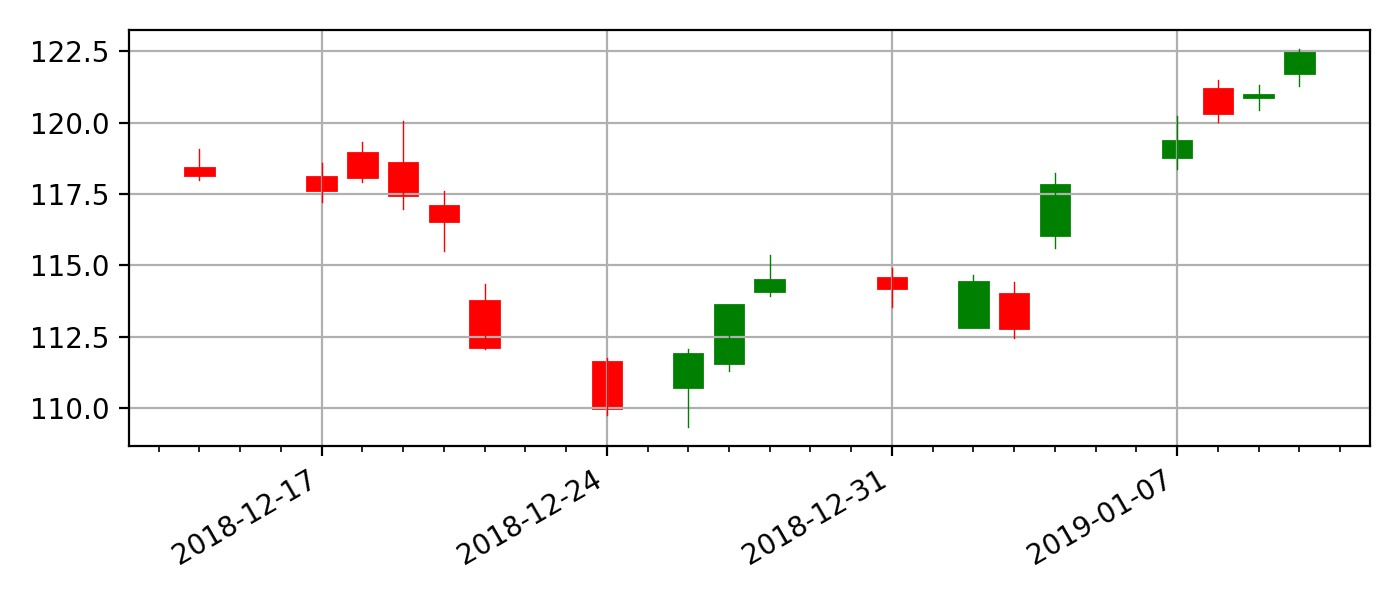

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU # locatorをWeekdayLocatorにするなら必要


fig = plt.figure(figsize=(7, 3)) # figure(図を配置する画面)のサイズを指定
ax = plt.subplot() # figureには複数の図を配置できるので、そのうち図を1つ描画する空間を準備

# mpl_financeのcandlestick_ohlc関数を使ってローソク足を描画
mpl_finance.candlestick_ohlc(ax, data, width=0.7, colorup='g', colordown='r')

ax.grid()  # グリッド表示を描画

############# X軸のlocator (幅)の設定 #################
#locator = mdates.AutoDateLocator() #  # x軸の主軸の間隔を自動調整する
#locator = mdates.DayLocator(bymonthday=None, interval=2) # x軸を主軸の間隔を日単位にする。毎月15日や2日おきなども可能
#locator = mdates.WeekdayLocator(byweekday=(MO, TH))  # x軸の主軸の間隔を毎週月木にする
locator = mdates.WeekdayLocator(byweekday=(MO))  # x軸の主軸の間隔を毎週月木にする
#locator = mdates.MonthLocator() # x軸の主軸の間隔を月単位にする
#locator = mdates.YearLocator() # x軸の主軸の間隔を年単位にする
ax.xaxis.set_major_locator(locator) # X軸の主軸の間隔を設定
ax.xaxis.set_minor_locator(mdates.DayLocator()) # X軸の補助軸の間隔を日付に設定（X軸にメモリが追加される）

############# X軸のformatterの設定 #################
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator)) # X軸の主軸のラベルをdateフォーマットにする

fig.autofmt_xdate() # X軸の日付ラベルが見やすくなるよう回転
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')# 軸を右揃えにして斜めに
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/TimeSeriesDataAnalysis1.png') # 図を画像として保存